# TNM112 -- Lab 3

### Imports and data generation
Load cifar-10 dataset and convert to grayscale

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


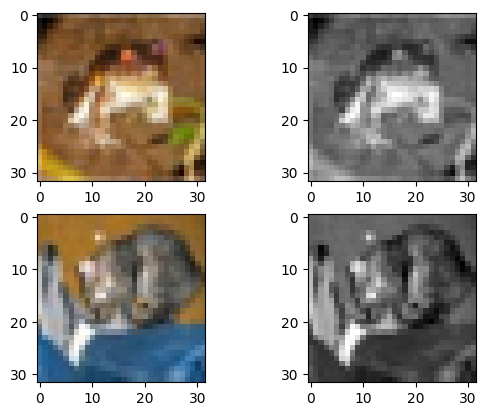

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras import layers, models
import random

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# Convert to grayscale
# Standard luminance weights (0.2989, 0.5870, 0.1140)
x_train_grayscale = np.dot(x_train[:,:,:], [0.2989, 0.5870, 0.1140])
x_test_grayscale = np.dot(x_test[:,:,:], [0.2989, 0.5870, 0.1140])


# Print images to check grayscale works
plt.subplot(2,2,1)
plt.imshow(x_train[0])

plt.subplot(2,2,2)
plt.imshow(x_train_grayscale[0], cmap='gray')

plt.subplot(2,2,3)
plt.imshow(x_test[0])

plt.subplot(2,2,4)
plt.imshow(x_test_grayscale[0], cmap='gray')

plt.show()

## Build Model

In [ ]:
# Input
x = layers.Input(shape=(32,32,1))

augmentation = layers.RandomContrast(0.2)(x)
augmentation = layers.RandomBrightness(0.2)(augmentation)

conv1 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(augmentation)
conv1 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(pool1)
conv2 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2,2))(conv2)

conv3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(pool2)
conv3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(conv3)
pool3 = layers.MaxPooling2D(pool_size=(2,2))(conv3)

conv4 = layers.Conv2D(512, (3,3), padding="same", activation="relu")(pool3)
conv4 = layers.Conv2D(512, (3,3), padding="same", activation="relu")(conv4)

upSample1 = layers.UpSampling2D(size=(2,2))(conv4)
concat1 = layers.Concatenate()([upSample1, conv3])
conv5 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(concat1)
conv5 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(conv5)

upSample2 = layers.UpSampling2D(size=(2,2))(conv5)
concat2 = layers.Concatenate()([upSample2, conv2])
conv6 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(concat2)
conv6 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(conv6)

upSample3 = layers.UpSampling2D(size=(2,2))(conv6)
concat3 = layers.Concatenate()([upSample3, conv1])
conv7 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(concat3)
conv7 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(conv7)

# Output
y = layers.Conv2D(3, (1,1), activation="sigmoid")(conv7)

model = models.Model(inputs=x, outputs=y)
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_contrast     │ (None, 32, 32, 1) │          0 │ input_layer[0][0] │
│ (RandomContrast)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_brightness   │ (None, 32, 32, 1) │          0 │ random_contrast[… │
│ (RandomBrightness)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        640 │ random_brightnes… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 128) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 256) │    590,080 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 256) │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 4, 4, 512) │  1,180,160 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 4, 4, 512) │  2,359,808 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8, 8, 768) │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │                   │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 256) │  1,769,728 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 256) │    590,080 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 16, 16,    │          0 │ conv2d_9[0][0]  

 Total params: 7,781,891 (29.69 MB)

 Trainable params: 7,781,891 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [ ]:
epochs = 5
batch_size = 32

model.fit(x_train_grayscale, x_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 41ms/step - loss: 0.0592 - val_loss: 0.0371
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - loss: 0.0482 - val_loss: 0.0222
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - loss: 0.0419 - val_loss: 0.0172
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - loss: 0.0395 - val_loss: 0.0147
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - loss: 0.0387 - val_loss: 0.0168


## Evaluation

In [ ]:
loss = model.evaluate(x_test_grayscale, x_test)

print("Test loss: ", loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0169
Test loss:  0.01682608388364315


## Colorization

In [ ]:

colorized_images = model.predict(x_test_grayscale)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


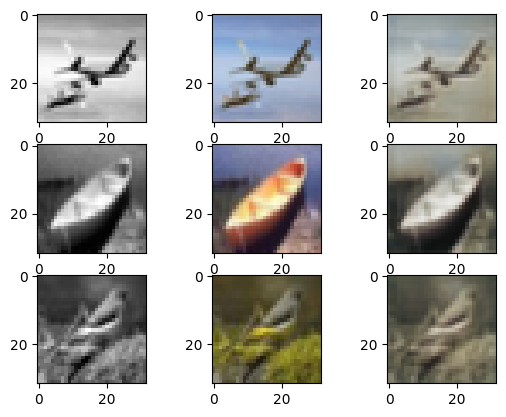

In [ ]:
img_num = 3

for i in range(img_num):
  index = random.randint(0,10000)

  plt.subplot(img_num,3,1 + i*3)
  plt.imshow(x_test_grayscale[index], cmap='gray')

  plt.subplot(img_num,3,2 + i*3)
  plt.imshow(x_test[index])

  plt.subplot(img_num,3,3 + i*3)
  plt.imshow(colorized_images[index])

plt.show()

